In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [176]:
job="full-stack_developer"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [177]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Accern Technologies,Lead Fullstack Developer,Bengaluru,0.0,"Jira, Elasticsearch, Node.js, React, Web devel...",3.6,Full-Stack Developer
1,Reveleer,Full Stack Software Engineer,Chennai,0.0,"CI/CD, Azure, React, Mobile applications, .NET...",3.7,Full-Stack Developer
2,Citi,Full Stack Java Developer- 4-10Years - CHENNAI,Chennai,650000.0,"CI/CD, Oracle, Software deployment, DevOps, To...",3.7,Full-Stack Developer
3,Tech Concierge Pro,PHP Web Developer,Remote,1800000.0,"CI/CD, AJAX, CSS, Software troubleshooting, De...",NaN,Full-Stack Developer
4,Vividco,Junior Web Developer,Remote,250000.0,"Node.js, CSS, Software troubleshooting, React,...",NaN,Full-Stack Developer


In [178]:
df.isnull().sum()

company_name               0
job_role                   0
job_location               0
salary_pa                  0
skills                    25
company_rating           573
standardized_job_role      0
dtype: int64

In [179]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [180]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Accern Technologies,Lead Fullstack Developer,Bengaluru,0.0,"Jira, Elasticsearch, Node.js, React, Web devel...",3.6,Full-Stack Developer
1,Reveleer,Full Stack Software Engineer,Chennai,0.0,"CI/CD, Azure, React, Mobile applications, .NET...",3.7,Full-Stack Developer
7,Creative Web Solutions,Next.Js Developer Fresher,Remote,0.0,"React, English, Express.js, JavaScript, REST",5.0,Full-Stack Developer
21,Aximz Technologies,Junior Web Developer (0-1 year),Chennai,0.0,"Web design, AJAX, UX, JSON, Python",NaN,Full-Stack Developer
36,Encoding Enhancers,Backend Web Developer - Node,Noida,0.0,"Node.js, CSS, Git, Databases, JavaScript",4.2,Full-Stack Developer
...,...,...,...,...,...,...,...
1014,Konrad GmbH,Web Developer,India,0.0,"ADAS, ASP.NET, Oracle, Visual Basic, .NET",3.6,Full-Stack Developer
1015,Ocrolus,Senior Software Engineer - Full Stack,Remote,0.0,"Data modeling, React, Java, Microservices, AWS",3.5,Full-Stack Developer
1018,Google,Web Application Engineer,Bengaluru,0.0,"Authentication, Cloud infrastructure, Google C...",4.3,Full-Stack Developer
1019,Helius Technologies,Fullstack Engineer,India,0.0,"Node.js, Haskell, Scala, Python",4.2,Full-Stack Developer


### Filling the null values by replacing with average salary of company rating

In [182]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [183]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [184]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Accern Technologies,Lead Fullstack Developer,Bengaluru,14.740909,"Jira, Elasticsearch, Node.js, React, Web devel...",3.6,Full-Stack Developer
1,Reveleer,Full Stack Software Engineer,Chennai,13.933333,"CI/CD, Azure, React, Mobile applications, .NET...",3.7,Full-Stack Developer
2,Citi,Full Stack Java Developer- 4-10Years - CHENNAI,Chennai,6.500000,"CI/CD, Oracle, Software deployment, DevOps, To...",3.7,Full-Stack Developer
3,Tech Concierge Pro,PHP Web Developer,Remote,18.000000,"CI/CD, AJAX, CSS, Software troubleshooting, De...",0.0,Full-Stack Developer
4,Vividco,Junior Web Developer,Remote,2.500000,"Node.js, CSS, Software troubleshooting, React,...",0.0,Full-Stack Developer
...,...,...,...,...,...,...,...
1027,Bay Area STEAM Academy,"Creative No-Code Web Designer (Figma, Webflow,...",Remote,0.900000,"Web design, Typography, CSS, Web development, ...",0.0,Full-Stack Developer
1028,Capital Placement Services,Web Designer For IT Company in Gurgaon,Gurgaon,15.500000,"Microsoft Powerpoint, Microsoft Word, Typograp...",0.0,Full-Stack Developer
1029,MegaMinds United IT Solutions PVT LTD,Web Designer,Ahmedabad,2.700000,"Adobe Photoshop, CSS, Adobe Illustrator, Respo...",0.0,Full-Stack Developer
1030,Hatchberries Technologies Pvt. Ltd.,Web Designer,Cochin,19.440000,"Web design, Adobe Photoshop, Typography, CSS, ...",4.0,Full-Stack Developer


In [185]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [186]:
df.describe()

,salary_lpa,company_rating
count,1032.000000,1032.000000
mean,9.210497,1.755620
std,8.856233,2.012089
min,0.060000,0.000000
25%,4.375385,0.000000
50%,6.600000,0.000000
75%,11.954286,3.900000
max,48.000000,5.000000


In [187]:
df.nunique()

company_name             942
job_role                 354
job_location              81
salary_lpa               155
skills                   867
company_rating            33
standardized_job_role      1
dtype: int64

In [188]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [190]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [191]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                        Skill  Count
3                       react    570
14                        css    509
2                     node.js    478
15   software troubleshooting    194
5                       ci/cd    183
..                        ...    ...
169                       jpa      1
92                 statistics      1
32        process improvement      1
162                   banking      1
243                  firewall      1

[244 rows x 2 columns]


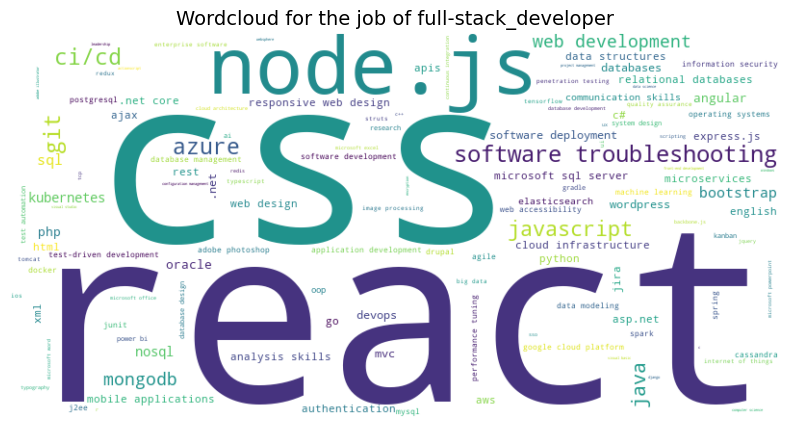

In [192]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


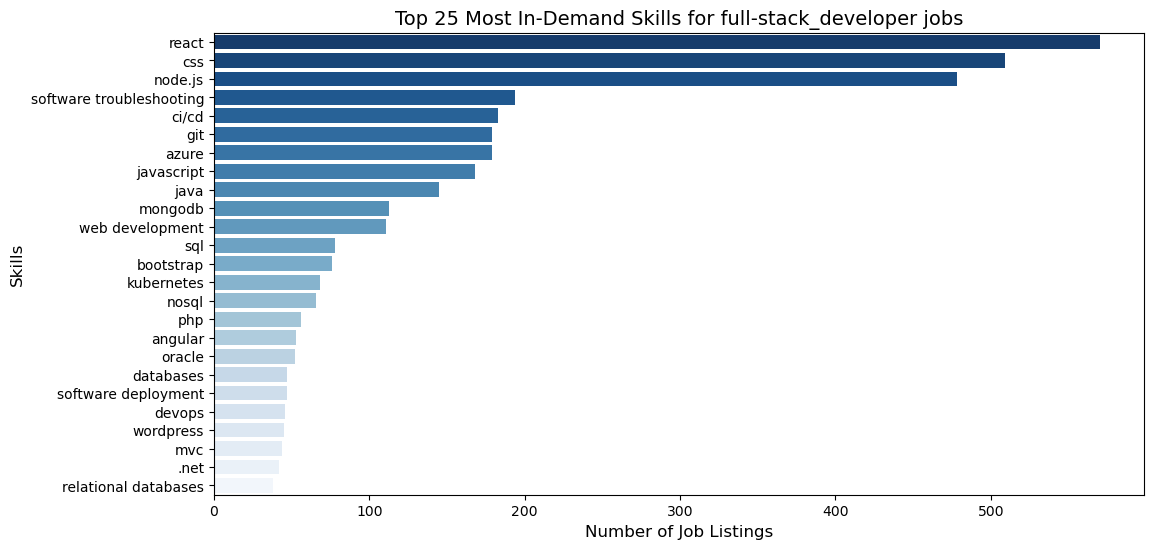

In [193]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [195]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                                company_name  salary_lpa
451                         Keywords Studios       48.00
46                               Aganitha AI       48.00
55                                 Akra Tech       48.00
405                                  Infoane       48.00
272                         Emblix Solutions       48.00
13                         ANSI BYTECODE LLP       48.00
788                                     Uber       47.28
916  i-Sourcing Technologies Private Limited       46.80
187                                 Coinbase       46.00
422                             InspironLabs       45.00


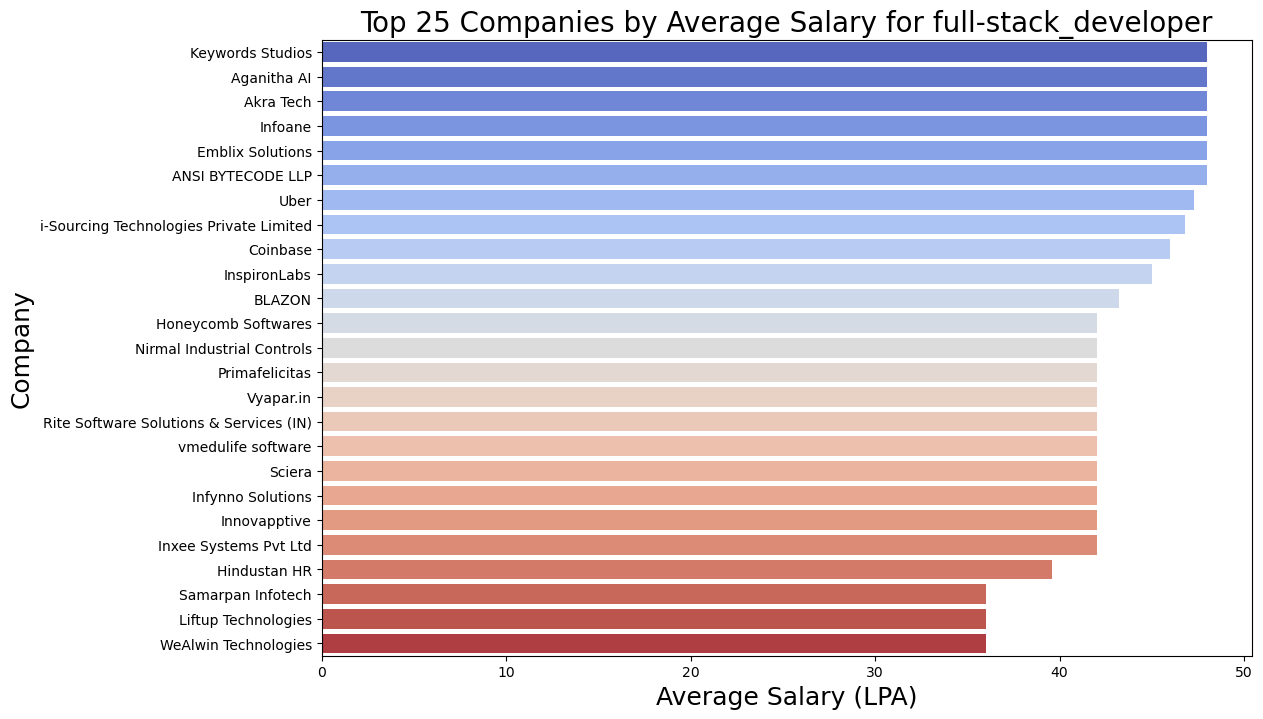

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

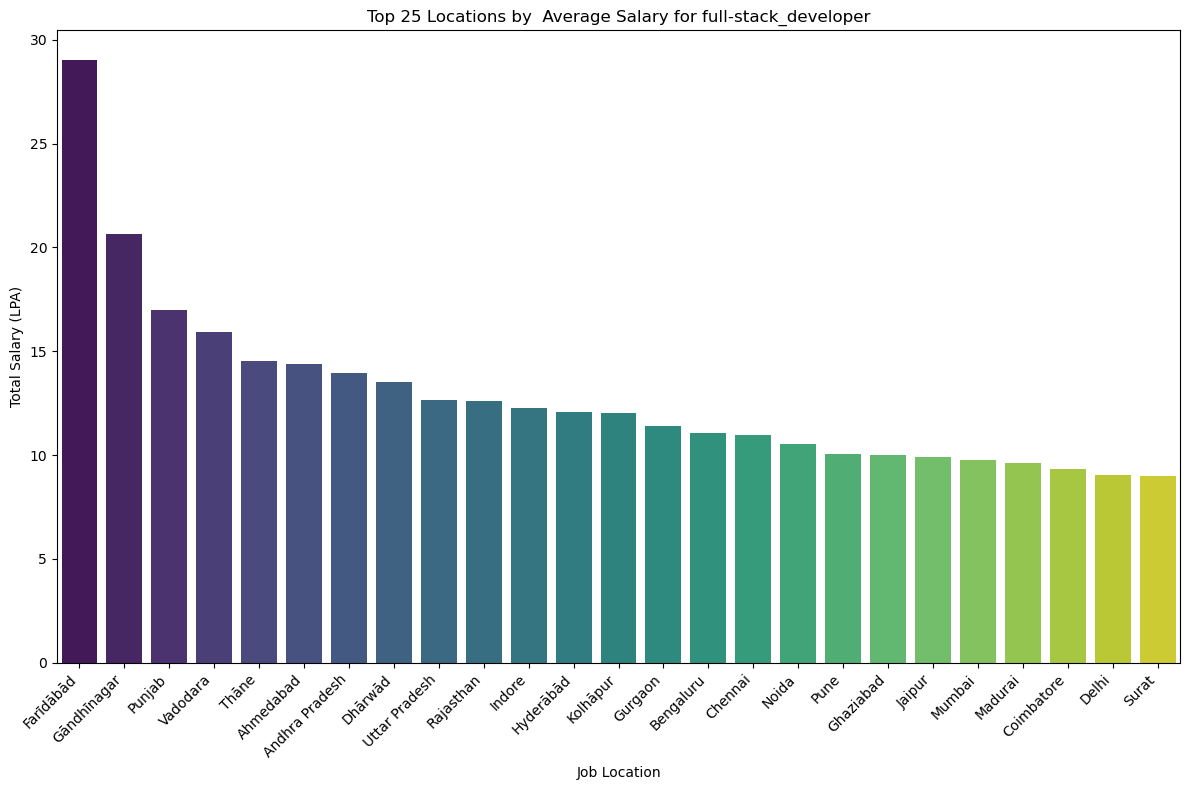

In [198]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

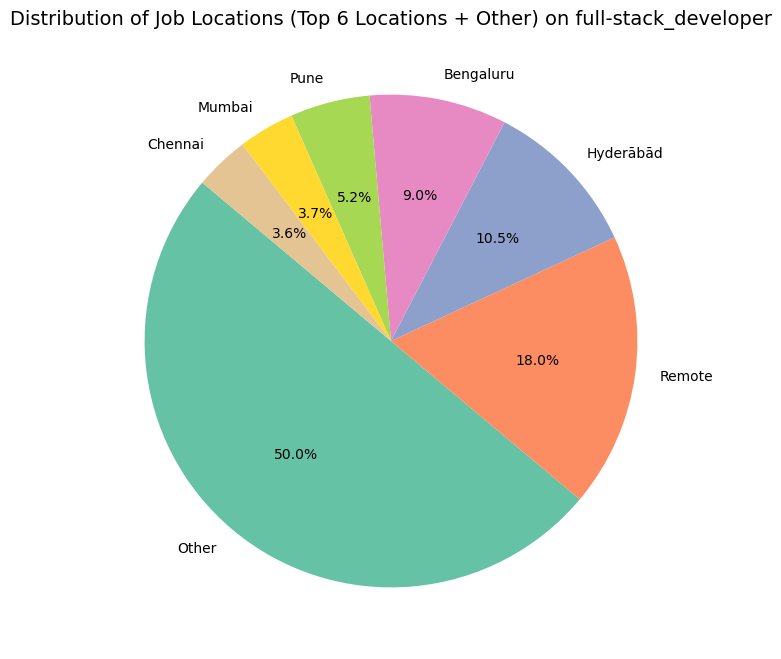

In [199]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

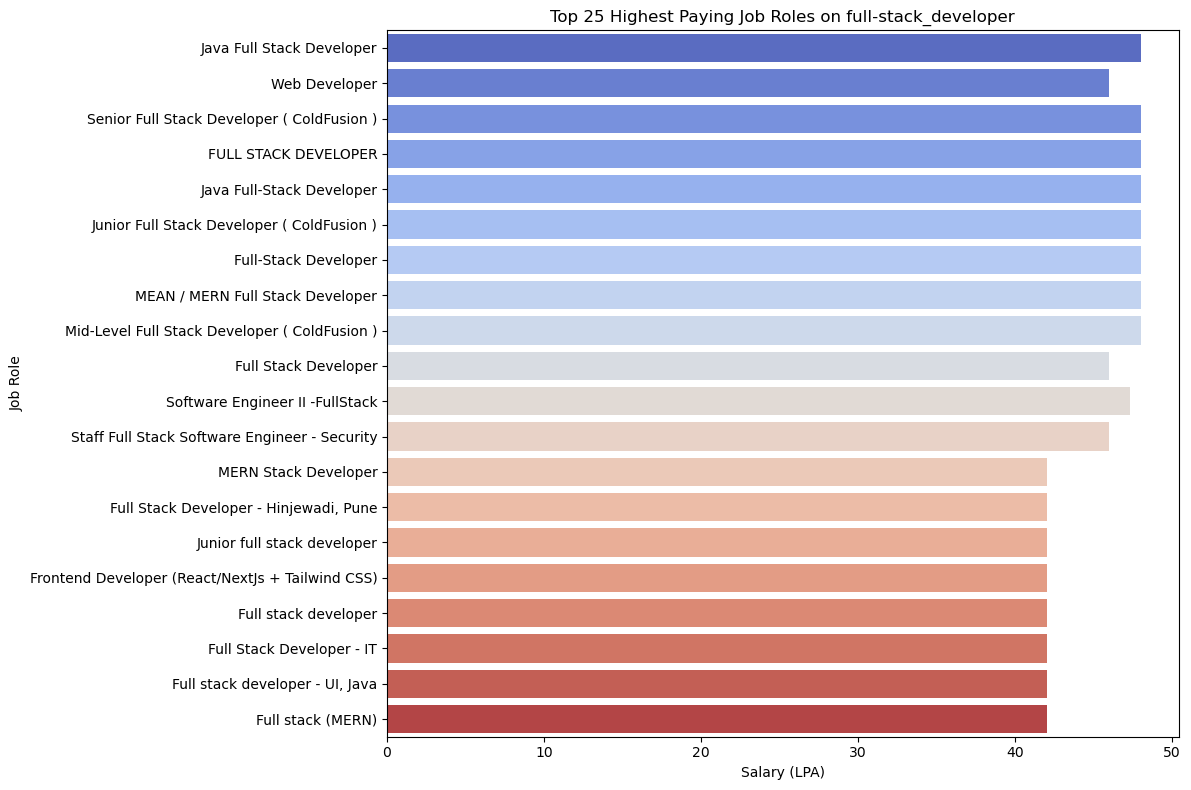

In [201]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [203]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_18416\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


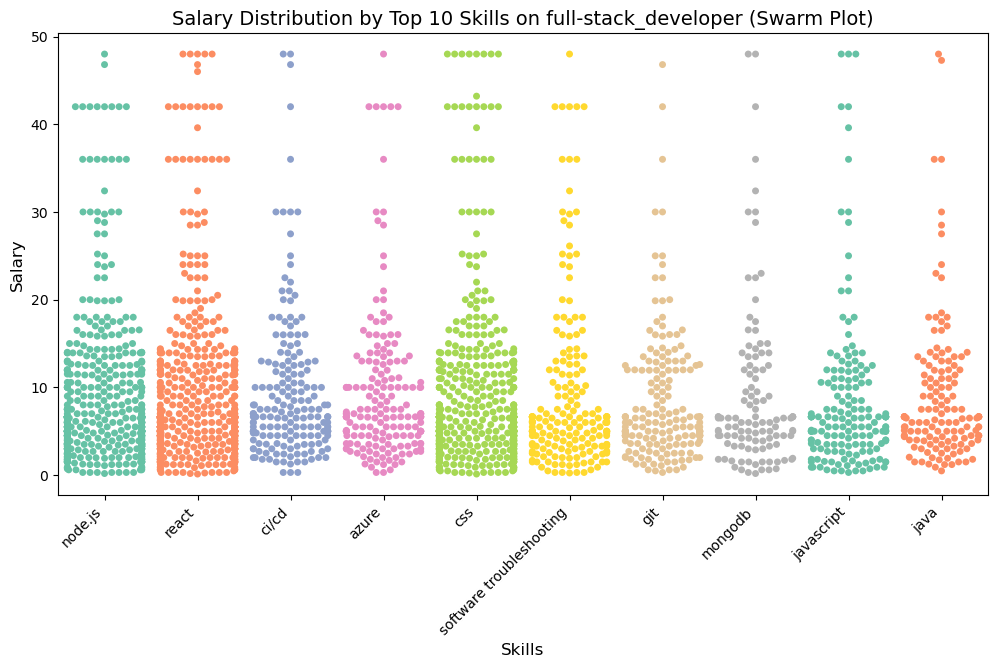

In [204]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

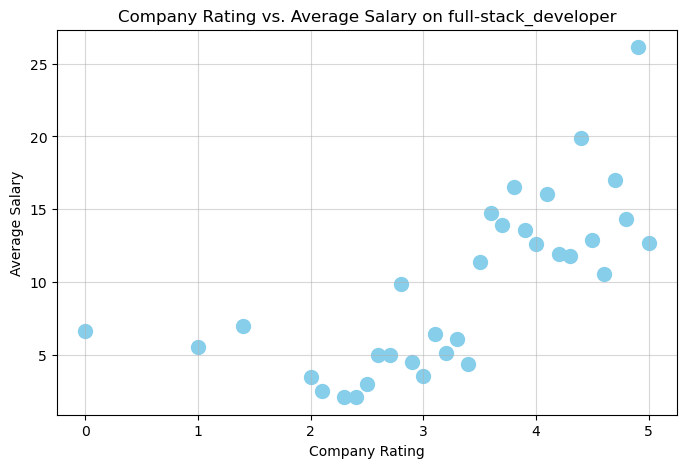

In [206]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [207]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.20789555279181007